Summarize results from the gene editing scenarion in which the top 1% of bulls and no (0%) cows were edited for the horned locus.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.mpl_style', 'default')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

/home/jcole/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
plt.rcdefaults()
# Typeface sizes
from matplotlib import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Computer Modern Roman']
#rcParams['text.usetex'] = True

# Optimal figure size
WIDTH = 350.0  # the number latex spits out
FACTOR = 0.90  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR

inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims      = [fig_width_in, fig_height_in] # fig dims as a list

rcParams['figure.figsize'] = fig_dims

In [4]:
methods = ['noedits', 'zfn', 'talen', 'crispr', 'perfect']
for method in methods:
    # We have 10 relicates for each simulation
    for sim in xrange(1,11):
        # Load the individual allele frequency history files
        af = pd.read_csv('horned/01_00/%s/%s/minor_allele_frequencies_%s.txt'%(method,sim,method), sep='\t')
        af.columns = ['generation', 'frequency']
        af['replicate'] = sim
        af['method'] = method
        if sim == 1 and method == methods[0]:
            all_replicates = af
        else:
            all_replicates = pd.concat([all_replicates, af])

In [5]:
grouped = all_replicates.groupby(['generation', 'method']).mean().reset_index()
grouped.head()

,generation,method,frequency,replicate
0,1,crispr,0.983665,5.5
1,1,noedits,0.982287,5.5
2,1,perfect,0.983524,5.5
3,1,talen,0.987648,5.5
4,1,zfn,0.983079,5.5


In [6]:
expected = {}
actual = {}

for r in ['Horned']:
    expected[r] = {}
    actual[r] = {}
    for method in methods:
        expected[r][method] = []
        actual[r][method] = []
        for g in xrange(1,21):
            if g == 1:
                expected[r][method].append(float(grouped[(grouped['generation']==g) & (grouped['method']==method)]['frequency']))
            else:
                q0 = expected[r][method][g-2]
                p0 = 1. - q0
                q1 = (p0*q0) + q0**2
                expected[r][method].append(q1)
            actual[r][method].append(float(grouped[(grouped['generation']==g) & (grouped['method']==method)]['frequency']))
        
#for k in expected[r].keys():
#print k, ':\t', expected[r][k], '\n'
    
print expected['Horned']['crispr']

[0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998, 0.9836651014873998]


In [17]:
import seaborn as sns

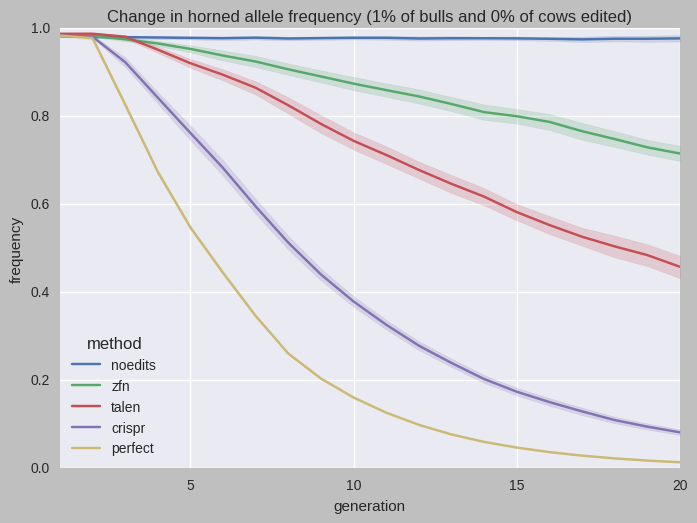

In [19]:
sns.set(style="darkgrid")
sns_plot = sns.tsplot(data=all_replicates, time="generation", unit="replicate", condition="method", value="frequency")
sns.plt.title('Change in horned allele frequency (1% of bulls and 0% of cows edited)')
plt.show()
#sns_plot.get_figure().savefig('horned/01_00/rate_of_allele_frequency_change_horned_01_00.png', dpi=300)

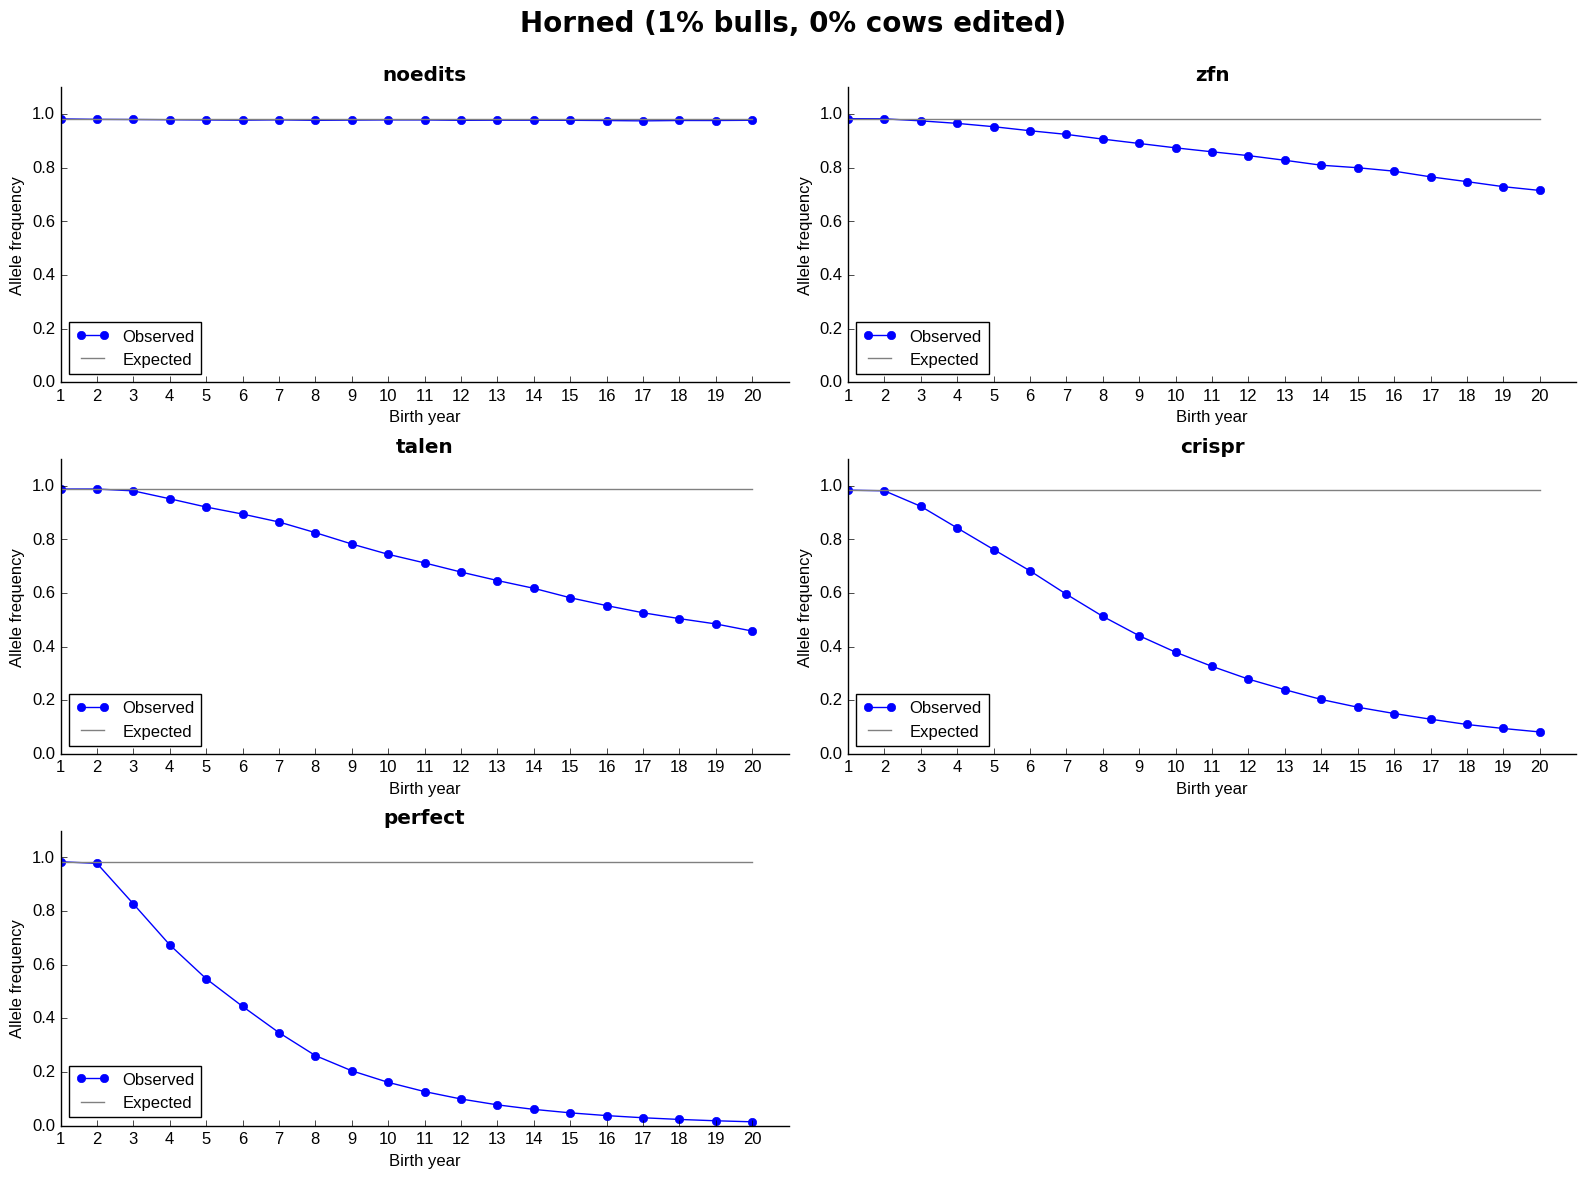

In [53]:
fig = plt.figure(figsize=(16, 12), dpi=300, facecolor='white')

xlabels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
colors = itertools.cycle(['r', 'g', 'b'])

for r in ['Horned']:
    for i, m in enumerate(methods):
        ax = fig.add_subplot(3, 2, i+1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(m, weight='bold')
        ax.set_xlabel('Birth year')
        ax.set_ylabel('Allele frequency')
        ax.plot(actual[r][m], label='Observed', marker='o', c='b', mec='b')
        ax.plot(expected[r][m], label='Expected', c='gray')
        if r == 'Horned':
            ax.set_ylim(0.0, 1.1)
        else:
            ax.set_ylim(0.0, 0.09)
        # Manually set the number of ticks on the plot
        ax.set_xticks(np.arange(20))
        # Apply the tick labels
        ax.set_xticklabels(xlabels)
        # Turn off the top and right tick marks
        plt.tick_params(
            axis='both',       # changes apply to both axes
            which='both',      # both major and minor ticks are affected
            right='off',
            labelright='off',
            top='off',         # ticks along the top edge are off
            labeltop='off')    # labels along the bottom edge are off
        # Place the legend
        ax.legend(loc='best')
        
# Use the recessive name as the title for each set of subplots
plt.suptitle('%s (1%% bulls, 0%% cows edited)'%r, fontsize=20, weight='bold')
plt.tight_layout(pad=1., w_pad=0.5, h_pad=0.95)
# Tweak the layout so that the subplot titles don't overlap because tight_layout()
# ignores suptitle().
plt.subplots_adjust(top=0.915)
plt.show()
#fig.savefig('/Users/jcole/Documents/AIPL/Genomics/Recessives/holstein-act-vs-exp-rec.png', dpi=300)
fig.savefig('holstein-act-vs-exp-horned-by-method_01_00.png', dpi=300)

Now we're going to regress frequency on birth year to estimate trend.

In [136]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
def fit_line(x, y):
    """Return RegressionResults instance of best-fit line."""
    #X = sm.add_constant(x)
    data = {'x':np.array(x), 'y':np.array(y)}
    fit = smf.ols(formula = 'y ~ x + I(x**2)', data=data).fit()
    print fit.summary()
    
    prstd, iv_l, iv_u = wls_prediction_std(fit)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, y, 'o', label="data")
    ax.plot(x, fit.fittedvalues, 'r', label="OLS")
    ax.plot(x, iv_u, 'r--')
    ax.plot(x, iv_l, 'r--')
    ax.legend(loc='best');
    ax.set_ylim(0.0, 1.1)
    ax.set_xlim(0., 20.)
    plt.show()
    
    return fit



==>  noedits
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     30.09
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.60e-06
Time:                        15:30:54   Log-Likelihood:                 114.90
No. Observations:                  20   AIC:                            -223.8
Df Residuals:                      17   BIC:                            -220.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9817      0.001   15

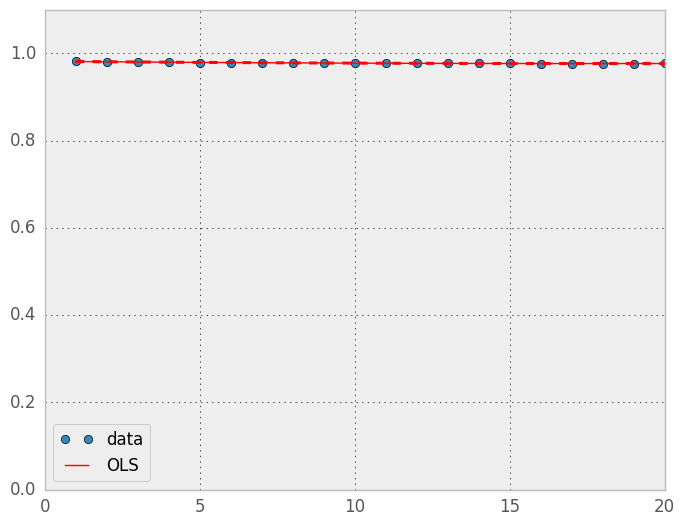



==>  zfn
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3144.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           1.45e-22
Time:                        15:30:55   Log-Likelihood:                 79.825
No. Observations:                  20   AIC:                            -153.7
Df Residuals:                      17   BIC:                            -150.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0060      0.004    278.8

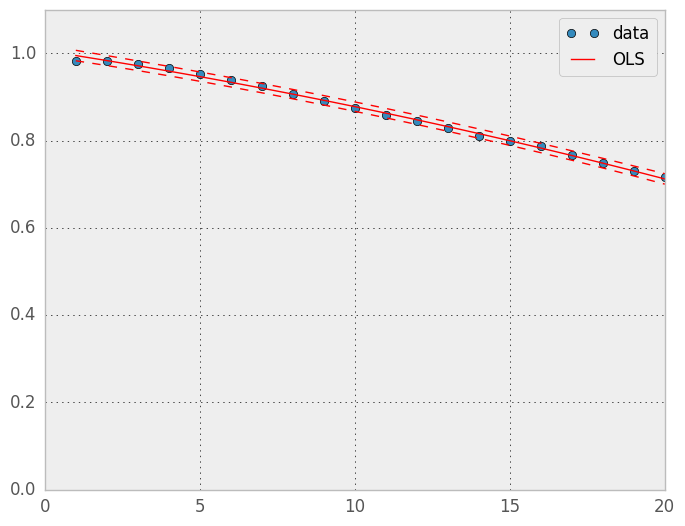



==>  talen
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1142.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           7.64e-19
Time:                        15:30:55   Log-Likelihood:                 55.116
No. Observations:                  20   AIC:                            -104.2
Df Residuals:                      17   BIC:                            -101.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0573      0.012     85

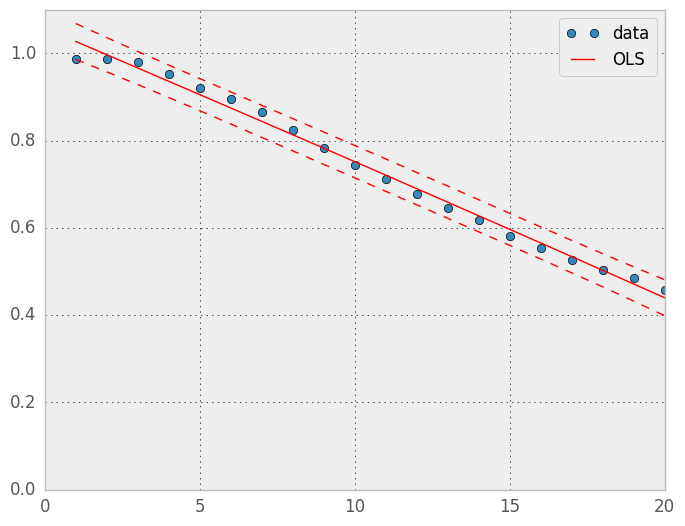



==>  crispr
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1147.
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           7.37e-19
Time:                        15:30:55   Log-Likelihood:                 44.166
No. Observations:                  20   AIC:                            -82.33
Df Residuals:                      17   BIC:                            -79.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1638      0.021     5

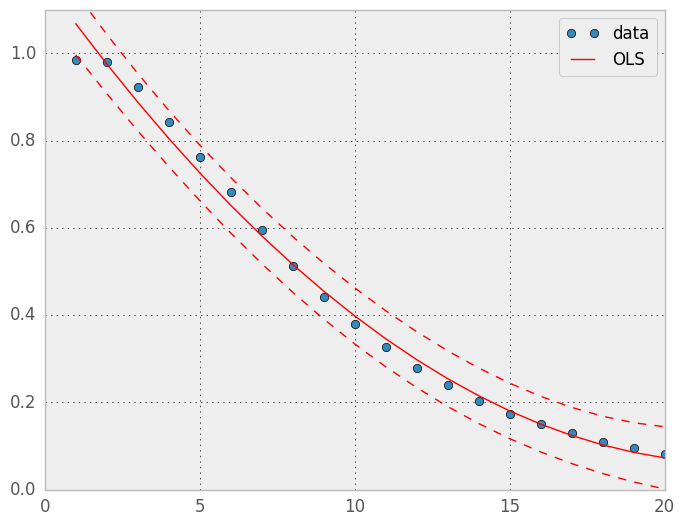



==>  perfect
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     735.2
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           3.11e-17
Time:                        15:30:56   Log-Likelihood:                 38.968
No. Observations:                  20   AIC:                            -71.94
Df Residuals:                      17   BIC:                            -68.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1688      0.028     

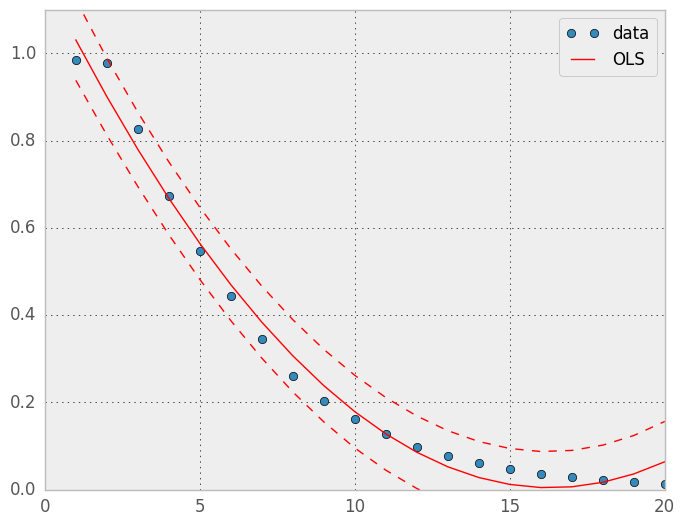

In [137]:
fits = {}
years = [float(i) for i in xrange(1,21)]
for r in ['Horned']:
    fits[r] = {}
    for m in methods:
        print '\n\n==> ', m
        fit = fit_line(y=actual[r][m], x=years)
        fits[r][m] = fit

Now we have to load the animal records so that we can compute the cumulative genetic gain for each gene editing method.

In [20]:
methods = ['noedits', 'zfn', 'talen', 'crispr', 'perfect']
#import dask.dataframe as dd
for method in methods:
    print method
    # We have 10 replicates for each simulation
    for sim in xrange(1,11):
        if sim == 1: print '\tReplicate: ', sim,
        elif sim < 10: print ', ', sim,
        else: print ', ', sim, ''
        # Load the individual history files
        #print '\t\tReading live cows.'
        lc = pd.read_csv('horned/01_00/%s/%s/cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading dead cows.'
        dc = pd.read_csv('horned/01_00/%s/%s/dead_cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading live bulls.'
        lb = pd.read_csv('horned/01_00/%s/%s/bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        #print '\t\tReading dead bulls.'
        db = pd.read_csv('horned/01_00/%s/%s/dead_bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        # Stack the individual animal datasets
        #print '\t\tConcatenating animal datasets'
        all_animals = pd.concat([lc, dc, lb, db], axis=0)
        all_animals['replicate'] = sim
        all_animals['method'] = method
        if method == methods[0] and sim == 1:
            #print '\t\tCreating initial dataframe for replicates.'
            #all_replicates = all_animals
            grouped = all_animals.groupby(['born', 'method']).mean().reset_index()
        else:
            #print '\t\tCreating successive dataframe for replicates.'
            grouped = pd.concat([grouped, all_animals.groupby(['born', 'method']).mean().reset_index()])

noedits
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
zfn
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
talen
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
crispr
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
perfect
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 


In [21]:
grouped.head()

,born,method,animal,sire,dam,herd,died,TBV,inbreeding,replicate
0,-9,noedits,35154.842105,0.0,0.0,84.842105,1.105263,313.765809,0.0,1.0
1,-8,noedits,35186.891892,0.0,0.0,109.243243,1.162162,288.884254,0.0,1.0
2,-7,noedits,35165.461538,0.0,0.0,109.230769,1.115385,320.854807,0.0,1.0
3,-6,noedits,35165.514286,0.0,0.0,99.228571,1.085714,371.285179,0.0,1.0
4,-5,noedits,35160.731707,0.0,0.0,99.414634,1.048780,257.144834,0.0,1.0


In [22]:
all_replicates['method'].value_counts()

zfn        200
talen      200
crispr     200
perfect    200
noedits    200
Name: method, dtype: int64

In [23]:
#grouped = all_replicates.groupby(['generation', 'method']).mean().reset_index()
#grouped.head()

In [24]:
grouped.sort_values(by=['method','born'], inplace=True)

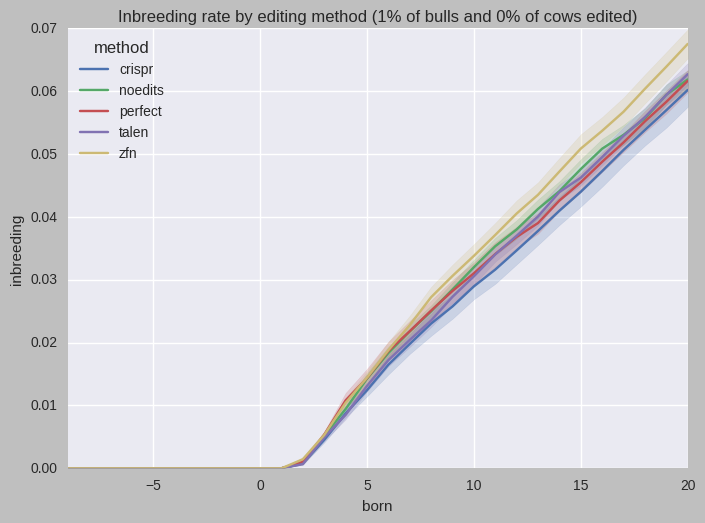

In [25]:
# Plot inbreeding by method
import seaborn as sns
sns.set(style="darkgrid")
sns_plot = sns.tsplot(data=grouped, time="born", unit="replicate", condition="method", value="inbreeding")
sns.plt.title('Inbreeding rate by editing method (1% of bulls and 0% of cows edited)')
plt.show()
sns_plot.get_figure().savefig('horned/01_00/rate_of_inbreeding_change_horned_01_00.png', dpi=300)

In [26]:
# http://stackoverflow.com/questions/22650833/pandas-groupby-cumulative-sum
grouped['TBV_cumulative'] = grouped.groupby(['method'])['TBV'].apply(lambda x: x.cumsum())

In [27]:
grouped.describe()

,born,animal,sire,dam,herd,died,TBV,inbreeding,replicate,TBV_cumulative
count,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.500000,6.110241e+05,4.964436e+05,4.599191e+05,99.490725,7.782207,1098.193986,0.021234,5.500000,87715.645159
std,8.658328,6.186931e+05,5.601136e+05,5.324020e+05,4.337162,5.170618,958.953398,0.022198,2.873239,94049.849701
min,-9.000000,1.726689e+04,0.000000e+00,0.000000e+00,70.400000,1.000000,-4.918624,0.000000,1.000000,232.319355
25%,-2.000000,3.517539e+04,0.000000e+00,0.000000e+00,99.095265,3.260014,283.504494,0.000000,3.000000,15149.246072
50%,5.500000,3.944860e+05,2.199147e+05,1.864220e+05,99.565070,6.493000,861.789800,0.015189,5.500000,40799.330262
75%,13.000000,1.144633e+06,9.662210e+05,8.937369e+05,99.973115,13.002983,1921.826879,0.040378,8.000000,145375.212704
max,20.000000,1.845276e+06,1.689280e+06,1.594862e+06,125.700000,15.394850,3271.860422,0.080760,10.000000,360386.852972


In [28]:
grouped['method'].value_counts()

zfn        300
talen      300
noedits    300
perfect    300
crispr     300
Name: method, dtype: int64

In [29]:
for method in grouped['method'].value_counts().keys():
    print method, grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative']

zfn 29    281117.392089
29    283766.665255
29    286391.138896
29    289042.858876
29    291674.649763
29    294343.752640
29    296953.374841
29    299568.536380
29    302216.059066
29    304900.152070
Name: TBV_cumulative, dtype: float64
talen 29    283243.633576
29    285901.906481
29    288642.134849
29    291342.306385
29    294005.371354
29    296667.762372
29    299382.932499
29    302058.480688
29    304764.065873
29    307432.262687
Name: TBV_cumulative, dtype: float64
noedits 29    330409.179965
29    333652.171793
29    336876.007488
29    340097.534386
29    343323.583322
29    346568.609794
29    349807.690015
29    353024.285706
29    356267.443325
29    359539.303748
Name: TBV_cumulative, dtype: float64
perfect 29    331290.899047
29    334548.792962
29    337780.596364
29    341042.129340
29    344264.323441
29    347505.540983
29    350714.550583
29    353939.841977
29    357177.094662
29    360386.852972
Name: TBV_cumulative, dtype: float64
crispr 29    290065.760428

In [30]:
for method in grouped['method'].value_counts().keys():
    print method, 'mean: ', grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative'].mean(),
    print 'stderr: ', grouped.loc[(grouped['method'] == method) & (grouped['born'] == 20)]['TBV_cumulative'].std()

import scipy.stats as stats
for pop1 in grouped['method'].value_counts().keys():
    for pop2 in grouped['method'].value_counts().keys():
        if pop1 != pop2:
            print pop1, ' ', pop2
            print stats.ttest_ind(a=grouped.loc[(grouped['method'] == pop1) & (grouped['born'] == 20)]['TBV_cumulative'],
                            b=grouped.loc[(grouped['method'] == pop2) & (grouped['born'] == 20)]['TBV_cumulative'],
                            equal_var=False)

zfn mean:  292997.457988 stderr:  7990.78092992
talen mean:  295344.085676 stderr:  8139.79102788
noedits mean:  344956.580954 stderr:  9791.1546936
perfect mean:  345865.062233 stderr:  9786.05060032
crispr mean:  302564.636384 stderr:  8403.58223586
zfn   talen
Ttest_indResult(statistic=-0.65056529547179254, pvalue=0.52354798629615651)
zfn   noedits
Ttest_indResult(statistic=-13.001190632253303, pvalue=2.3178699492854867e-10)
zfn   perfect
Ttest_indResult(statistic=-13.232650414035517, pvalue=1.7492297699806319e-10)
zfn   crispr
Ttest_indResult(statistic=-2.6089556095942434, pvalue=0.01778627434837091)
talen   zfn
Ttest_indResult(statistic=0.65056529547179254, pvalue=0.52354798629615651)
talen   noedits
Ttest_indResult(statistic=-12.321650266113625, pvalue=4.9632906752905939e-10)
talen   perfect
Ttest_indResult(statistic=-12.551147203253905, pvalue=3.7033662109130111e-10)
talen   crispr
Ttest_indResult(statistic=-1.9516684755069009, pvalue=0.066731161611131143)
noedits   zfn
Ttest_in

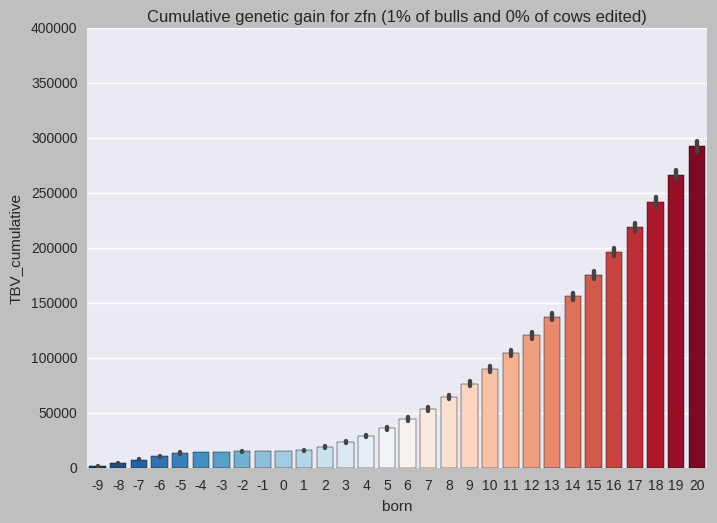

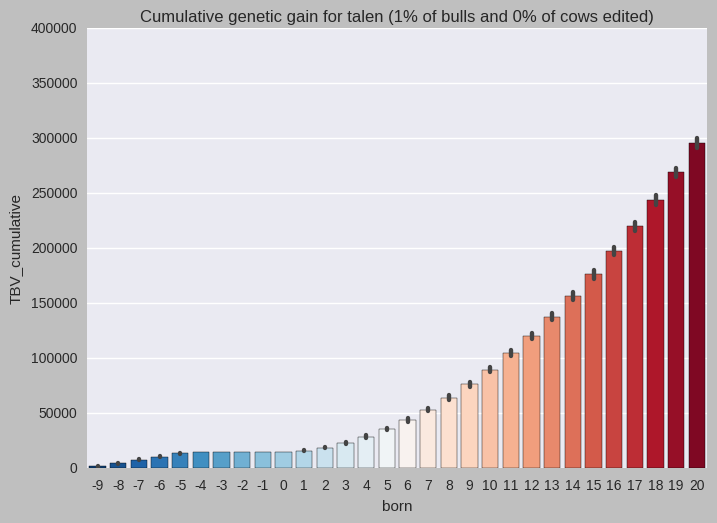

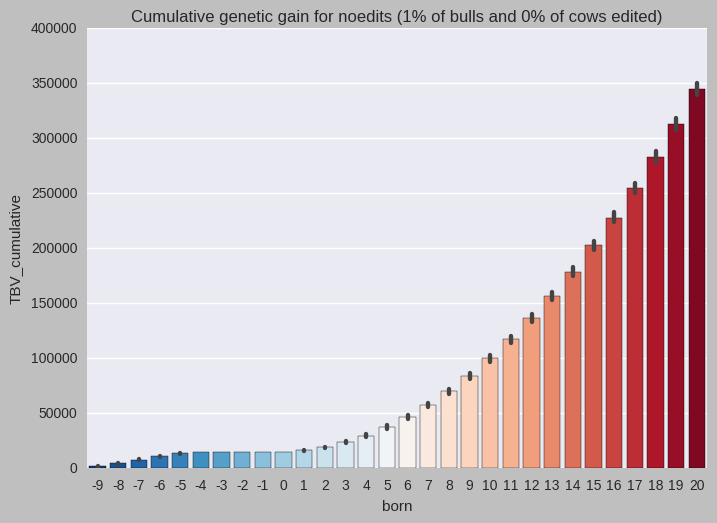

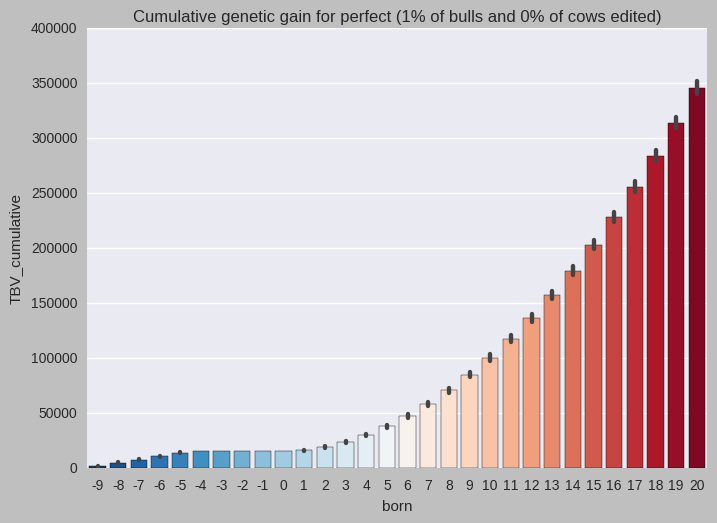

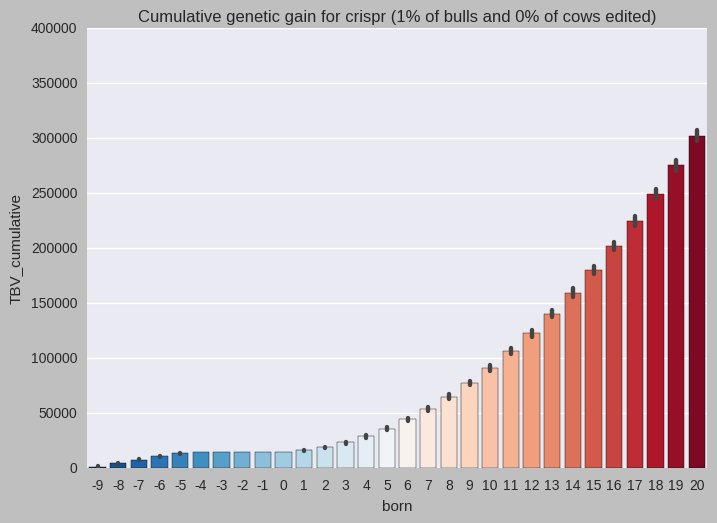

In [44]:
for method in grouped['method'].value_counts().keys():
    sns_plot = sns.barplot(grouped[grouped['method'] == method]['born'],
                grouped[grouped['method'] == method]['TBV_cumulative'],
                palette="RdBu_r")
    plt.ylim(0,400000)
    plt.title(method)
    sns.plt.title('Cumulative genetic gain for %s (1%% of bulls and 0%% of cows edited)'%(method))
    sns_plot.get_figure().savefig('horned/01_00/genetic_gain_horned_%s_01_00.png'%(method), dpi=300)
    plt.show()